In [1]:
%matplotlib inline

from matplotlib import rcParams

In [2]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve,auc
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score
from preprocess import KNeighborsImputer, rename_columns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
field_codes = {1: "Law", 2: "Math", 3: "Social Science, Psychologist", 4: "Medical Science, Pharmaceuticals, and Bio Tech", 5: "Engineering", 6: "English/Creative Writing/ Journalism", 7: "History/Religion/Philosophy", 8: "Business/Econ/Finance ", 9: "Education, Academia", 10: "Biological Sciences/Chemistry/Physics", 11: "Social Work", 12: "Undergrad/undecided ", 13:"Political Science/International Affairs", 14:"Film", 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"}

In [4]:
frame=rename_columns(pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1"))
frame['mn_sat'] = frame.mn_sat.str.replace(r',','').astype(float)
frame['tuition'] = frame.tuition.str.replace(r',','').astype(float)
frame['income'] = frame.income.str.replace(',','').astype(float)
frame['zipcode'] = frame.zipcode.str.replace(',','').astype(float)
frame['field_cd'] = frame.field_cd.map(field_codes)

findex=frame.gender==0
mindex=frame.gender==1

In [5]:
_id = pd.Index(['iid','pid'])
personal_attributes = pd.Index(['gender','age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'initial_race_importance', 'initial_religion_importance', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
pre_survey = pd.Index(['initial_happy_expectation', 'initial_number_expectation', 'initial_attractive_importance', 'initial_sincere_importance', 'initial_intelligence_importance', 'initial_fun_importance', 'initial_ambitious_importance', 'initial_shared_interests_importance', 'initial_attractive_same_importance', 'initial_sincere_same_importance', 'initial_intelligence_same_importance', 'initial_fun_same_importance', 'initial_ambitious_same_importance', 'initial_shared_same_importance', 'initial_attractive_opposite_importance', 'initial_sincere_opposite_importance', 'initial_intelligence_opposite_importance', 'initial_fun_opposite_importance', 'initial_ambitious_opposite_importance', 'initial_shared_opposite_importance', 'initial_attractive_self_measure', 'initial_sincere_self_measure', 'initial_fun_self_measure', 'initial_intelligence_self_measure', 'initial_ambitious_self_measure', 'initial_attractive_others_measure', 'initial_sincere_others_measure', 'initial_intelligence_others_measure', 'initial_fun_others_measure', 'initial_ambitious_others_measure'])
decisions = pd.Index(['dec','match'])
partner_attributes = pd.Index(['pid','partner','int_corr', 'samerace','age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o'])
wave_conditions = pd.Index(['condtn', 'wave', 'round', 'position','positin1', 'order'])
during_survey = pd.Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met'])
halfway_survey = pd.Index(['match_es', 'halfway_attractive_importance','halfway_sincere_importance', 'halfway_intelligence_importance','halfway_fun_importance', 'halfway_ambitious_importance','halfway_shared_interests_importance','halfway_attractive_self_measure', 'halfway_sincere_self_measure','halfway_intelligence_self_measure', 'halfway_fun_self_measure','halfway_ambitious_self_measure'])
followup_survey = pd.Index(['followup_overall_satisfaction','followup_length_dates_satisfaction','followup_num_dates_satisfaction','followup_attractive_influence','followup_sincere_influence','followup_intelligence_influence','followup_fun_influence','followup_ambitious_influence','followup_shared_interests_influence','followup_attractive_importance','followup_sincere_importance','followup_intelligence_importance','followup_fun_importance','followup_ambitious_importance','followup_shared_interests_importance','followup_attractive_same_importance','followup_sincere_same_importance','followup_intelligence_same_importance','followup_fun_same_importance','followup_ambitious_same_importance','followup_shared_same_importance','followup_attractive_opposite_importance','followup_sincere_opposite_importance','followup_intelligence_opposite_importance','followup_fun_opposite_importance','followup_ambitious_opposite_importance','followup_shared_opposite_importance','followup_attractive_self_measure','followup_sincere_self_measure','followup_intelligence_self_measure','followup_fun_self_measure','followup_ambitious_self_measure','followup_attractive_others_measure','followup_sincere_others_measure','followup_intelligence_others_measure','followup_fun_others_measure','followup_ambitious_others_measure',])
final_survey = pd.Index(['final_you_call_count','final_them_call_count','final_match_dates','final_num_match_seen','final_num_match_dates','final_attractive_importance','final_sincere_importance','final_intelligence_importance','final_fun_importance','final_ambitious_importance','final_shared_interests_importance','final_attractive_influence','final_sincere_influence','final_intelligence_influence','final_fun_influence','final_ambitious_influence','final_shared_interests_influence','final_attractive_same_importance','final_sincere_same_importance','final_intelligence_same_importance','final_fun_same_importance','final_ambitious_same_importance','final_shared_same_importance','final_attractive_opposite_importance','final_sincere_opposite_importance','final_intelligence_opposite_importance','final_fun_opposite_importance','final_ambitious_opposite_importance','final_shared_opposite_importance','final_attractive_self_measure','final_sincere_self_measure','final_intelligence_self_measure','final_fun_self_measure','final_ambitious_self_measure','final_attractive_others_measure','final_sincere_others_measure','final_intelligence_others_measure','final_fun_others_measure','final_ambitious_others_measure',])

In [6]:
frame.shape

(8378, 195)

In [7]:
frame.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,final_attractive_self_measure,final_sincere_self_measure,final_intelligence_self_measure,final_fun_self_measure,final_ambitious_self_measure,final_attractive_others_measure,final_sincere_others_measure,final_intelligence_others_measure,final_fun_others_measure,final_ambitious_others_measure
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
fframe = frame.loc[findex].copy()
mframe = frame.loc[mindex].copy()

## Cleaning 

In [9]:
text_columns = frame.dtypes[(frame.dtypes==object) & (~frame.dtypes.index.str.contains('name'))].index
frame[text_columns] = frame[text_columns].apply(lambda x: x.astype('category'))
categorical_columns = frame.dtypes[frame.dtypes=='category'].index
categorical_features = frame[categorical_columns]
for col in categorical_columns:
    categorical_features[col+'_code'] = categorical_features[col].cat.codes
categorical_features.head()

,field,field_cd,undergra,from,career,field_code,field_cd_code,undergra_code,from_code,career_code
0,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
1,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
2,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
3,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
4,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300


In [10]:
unique_date = wave_conditions.drop(['condtn','positin1','round']).tolist()
attributes_columns = (pre_survey | personal_attributes | _id | ['match'] | unique_date)
attributes_frame = frame.loc[:,attributes_columns].copy()

In [11]:
attributes_frame.isnull().sum().sort_values(ascending=False)[:20]

initial_number_expectation              6578
mn_sat                                  5245
tuition                                 4795
income                                  4099
initial_fun_others_measure              3472
initial_attractive_others_measure       3472
initial_sincere_others_measure          3472
initial_ambitious_others_measure        3472
initial_intelligence_others_measure     3472
undergra                                3464
initial_shared_same_importance          1911
initial_attractive_same_importance      1889
initial_fun_same_importance             1889
initial_ambitious_same_importance       1889
initial_intelligence_same_importance    1889
initial_sincere_same_importance         1889
zipcode                                 1064
initial_shared_interests_importance      121
initial_attractive_self_measure          105
initial_fun_self_measure                 105
dtype: int64

In [12]:
attributes_frame.shape,attributes_frame.match.sum()

((8378, 70), 1380)

In [13]:
attributes_frame.dropna(axis=1,thresh=8200,inplace=True)
attributes_frame.dropna(subset=['pid'],inplace=True)

for col in attributes_frame.columns:
    if hasattr(attributes_frame[col],'cat'):
        attributes_frame[col] = attributes_frame[col].cat.codes
attributes_frame = attributes_frame.replace(-1,np.nan)
attributes_frame.dropna(thresh=45,inplace=True)

In [14]:
attributes_frame.shape, attributes_frame.match.sum()

((8289, 53), 1365)

In [15]:
attributes_frame.isnull().sum().sort_values(ascending=False)[:20]

initial_shared_interests_importance      40
age                                      31
initial_sincere_self_measure             26
initial_ambitious_self_measure           26
initial_attractive_self_measure          26
initial_fun_self_measure                 26
initial_intelligence_self_measure        26
initial_happy_expectation                22
field_cd                                 19
initial_ambitious_importance             18
date                                     18
career                                   10
initial_shared_opposite_importance        9
initial_fun_importance                    9
initial_ambitious_opposite_importance     9
gaming                                    0
iid                                       0
hiking                                    0
goal                                      0
go_out                                    0
dtype: int64

In [16]:
#imputer = KNeighborsImputer(n_neighbors=6)
#filled_attributes_frame = imputer.fit_transform(attributes_frame).astype(int)
#filled_attributes_frame.to_pickle('imputed.pkl')
filled_attributes_frame = pd.read_pickle('imputed.pkl')

## Exploring

In [17]:
explore_frame = frame.copy()
explore_frame['gender'] = explore_frame.gender.map({0:'Female',1:'Male'})
females = explore_frame.gender.where(explore_frame.gender=='Female').dropna().index
males = explore_frame.gender.where(explore_frame.gender=='Male').dropna().index

In [18]:
sns.set_context(context='poster', font_scale=1, rc={'figure.dpi':'1200'})
sns.set_style('white')

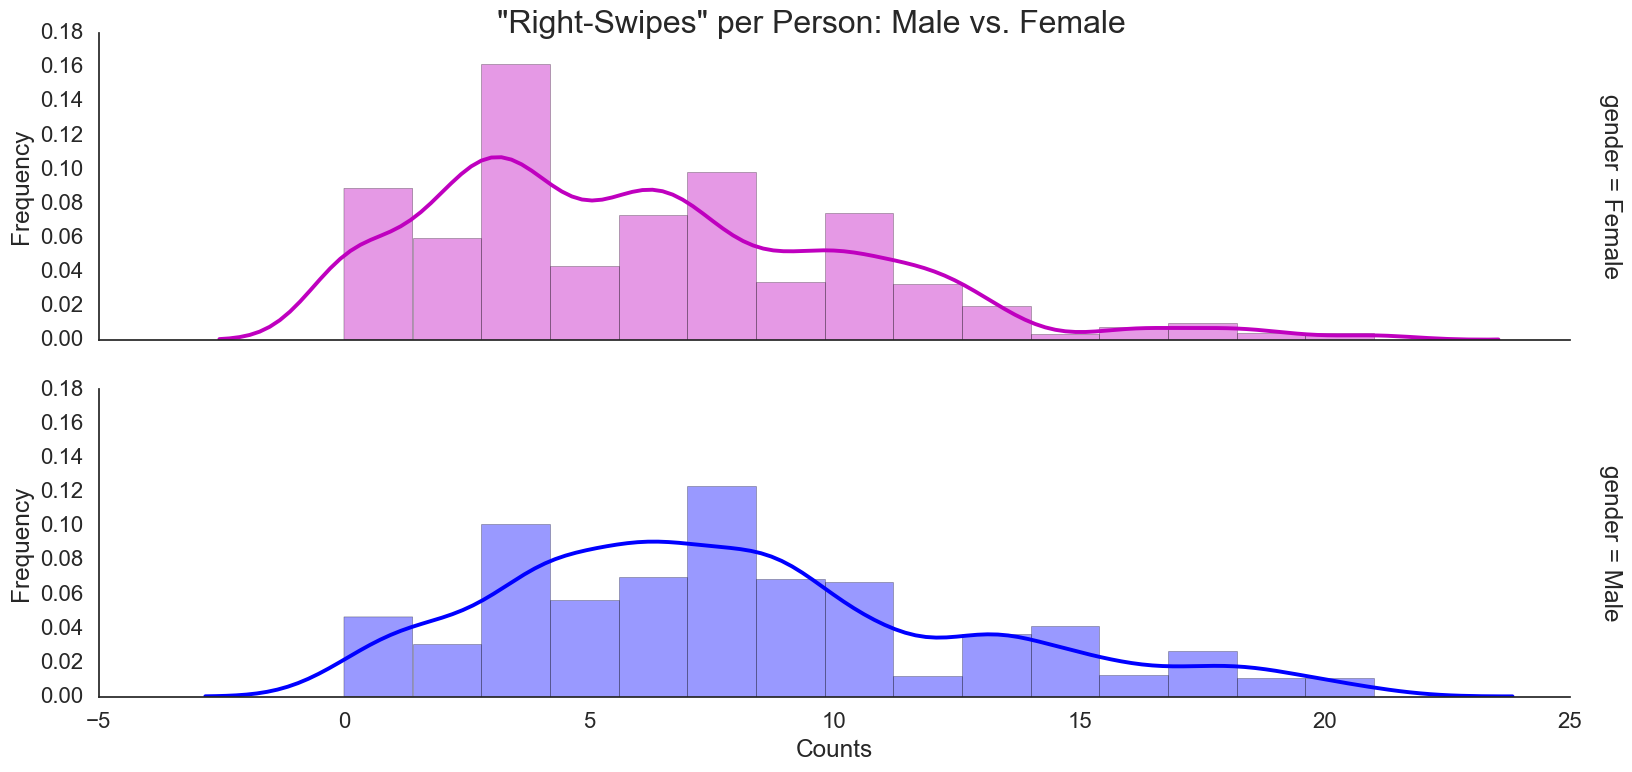

In [19]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['dec_person'] = explore_frame.groupby(['iid'])['dec'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['dec_person'] = explore_frame['round'] - explore_frame['dec_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('"Right-Swipes" per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'dec_person',bins=15,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
#g.savefig('../Assets/decs_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)
plt.show();

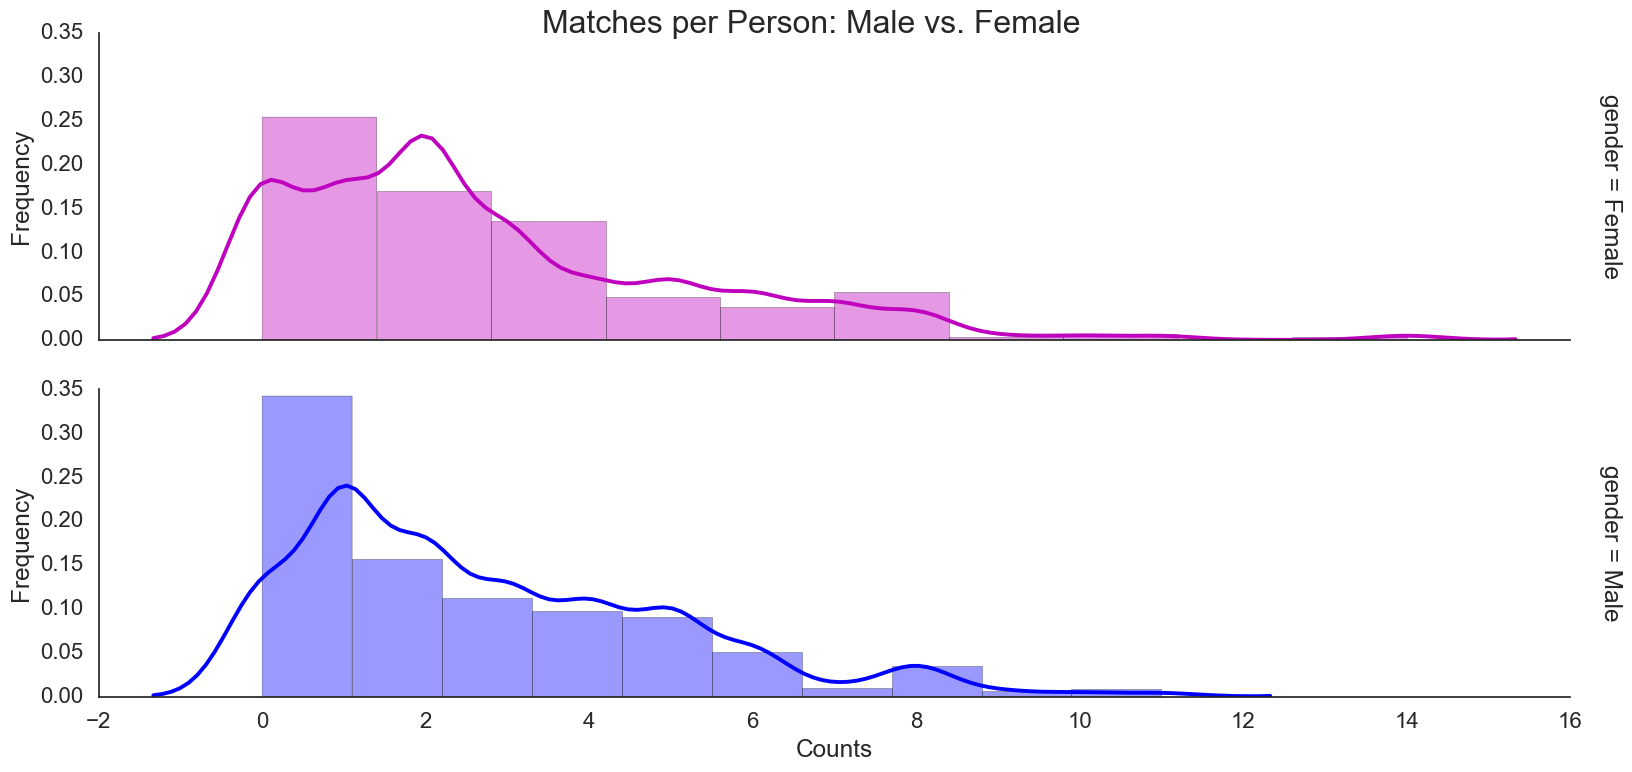

In [20]:
explore_frame['match_person'] = explore_frame.groupby(['iid'])['match'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['match_person'] = explore_frame['round'] - explore_frame['match_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('Matches per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'match_person',bins=10,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
#g.savefig('../Assets/matches_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)

plt.show();

In [21]:
iid_attributes = attributes_frame.groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[['field', 'field_cd', 'from', 'career']] = iid_attributes[['field', 'field_cd', 'from', 'career']].apply(lambda x: x.astype('category'))
iid_attributes['field_cd'] = iid_attributes.field_cd.map(field_codes).astype('category')
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
iid_attributes['gender'] = iid_attributes.gender.map({0:'Female',1:'Male'})
female_attributes = iid_attributes.loc[iid_attributes.gender=="Female"].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender=="Male"].drop('gender',axis=1)
#iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [22]:
field_counts = pd.DataFrame()
field_counts['Females'] = iid_attributes.loc[findex,'field_cd'].value_counts(normalize=True)
field_counts['Males'] = iid_attributes.loc[mindex,'field_cd'].value_counts(normalize=True)
field_counts['diff'] = field_counts.Males - field_counts.Females

field_counts['Gender'] = np.where(field_counts['diff'] > 0,'Male','Female'); field_counts

field_counts.sort_values(by='diff',inplace=True,ascending=False)
field_counts['diff'] = field_counts['diff'].abs()*500
field_counts = field_counts.reset_index().rename(columns={'index':'Field'}); field_counts.head()

,Field,Females,Males,diff,Gender
0,Math,0.111524,0.366300,127.388101,Male
1,"Medical Science, Pharmaceuticals, and Bio Tech",0.048327,0.157509,54.591010,Male
2,Biological Sciences/Chemistry/Physics,0.074349,0.102564,14.107330,Male
3,Social Work,0.018587,0.032967,7.189836,Male
4,Architecture,0.000000,0.003663,1.831502,Male


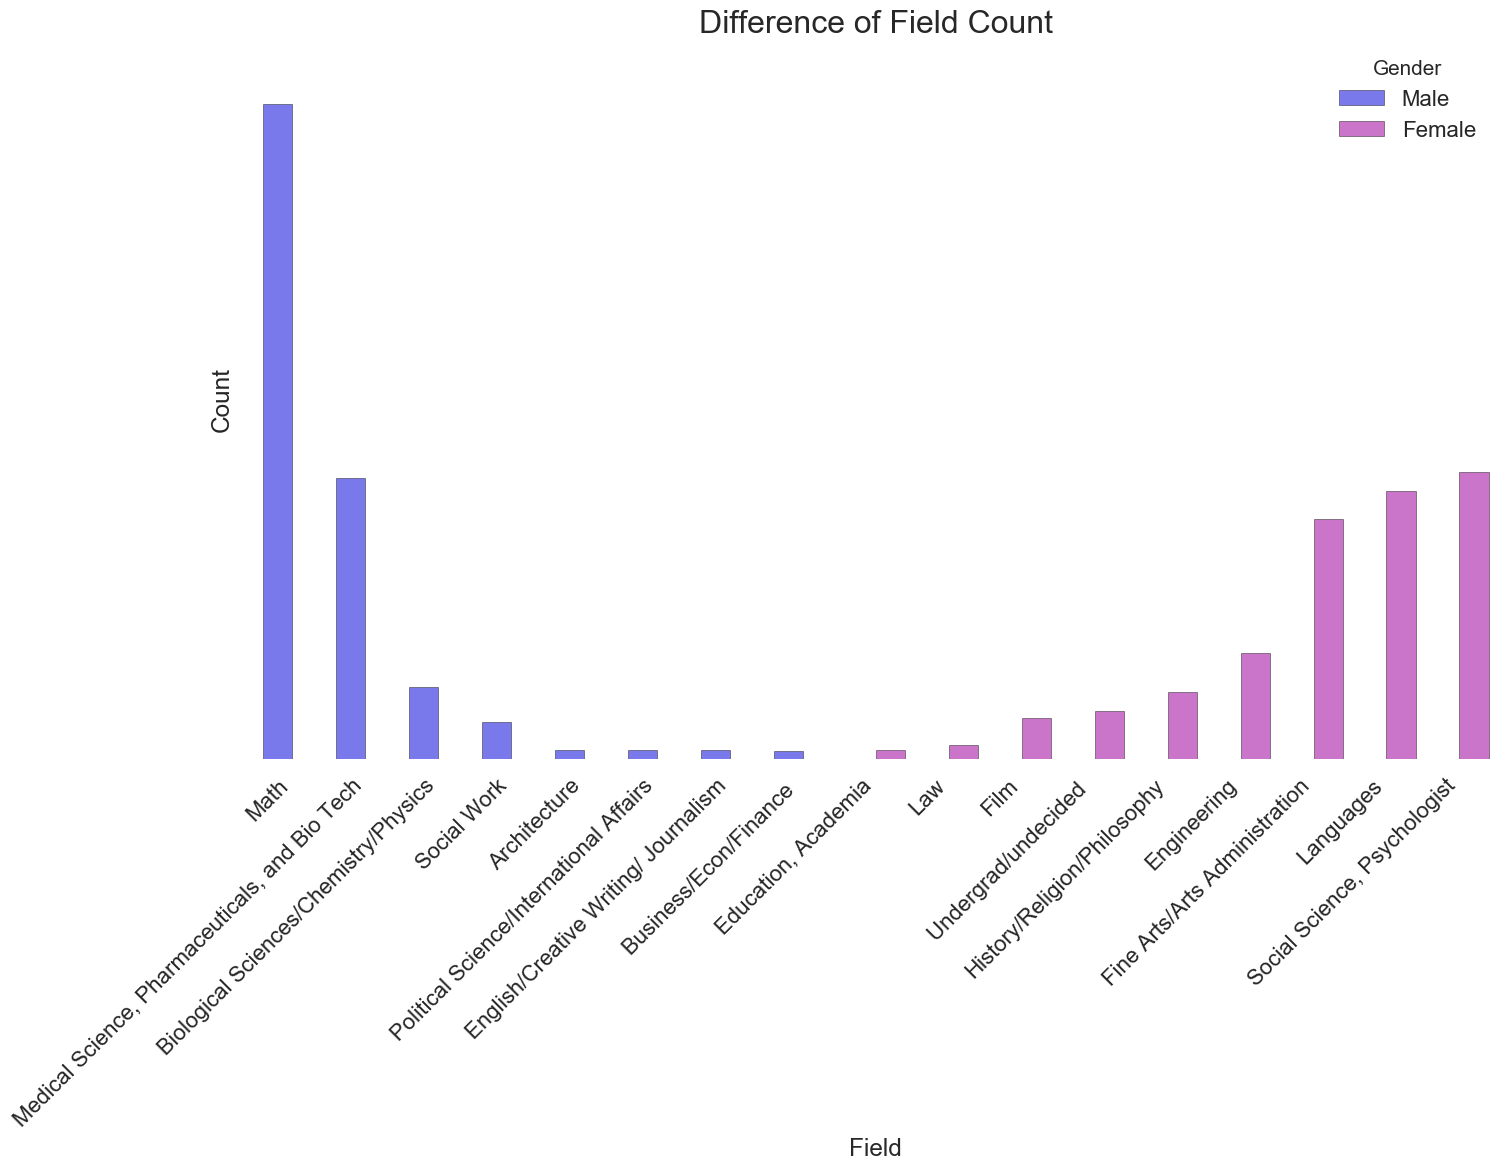

In [23]:
fig = plt.figure(figsize=(16,8))
ax0 = fig.add_subplot(111)

field_bar = sns.barplot(x='Field', y='diff', hue='Gender', data=field_counts,order=field_counts['Field'].tolist(),
                        alpha=.6,palette={"Female":'m',"Male":'b'},ax=ax0)
field_bar.set_title('Difference of Field Count',fontsize='large')
field_bar.set_autoscale_on(True)
field_bar.set_ylabel('Count')
field_bar.set_yticklabels('')
field_bar.figure.autofmt_xdate(bottom=0,rotation=45)
ax0.set_frame_on(False)
#field_bar.figure.savefig('../Assets/field_count_diff.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)
plt.show();

In [24]:
att_plot = iid_attributes.copy()
att_plot.dropna(inplace=True)
s=att_plot.shape[0]
num_col = att_plot.dtypes[att_plot.dtypes==(float or int)].index

att_plot.loc[:,num_col] = minmax.fit_transform(att_plot.loc[:,num_col])

att_plot.loc[:,num_col] = att_plot.loc[:,num_col].apply(lambda x: x+np.random.exponential(.8,s))

#p=sns.PairGrid(att_plot[num_col[0:8]],size=4, aspect=1)
#p.map_lower(plt.scatter,)
#p.map_diag(plt.hist)
#p.map_upper(sns.kdeplot)
#plt.show()

In [25]:
def sample_plotter(X, y):    
    
    colors = [(0.49803921580314636, 0.78823530673980713, 0.49803921580314636), (0.74219147983719336, 0.68359863477594707, 0.82745099032626435)]    
    size = 10
    a = .6
    v0 = 120
    v1 = 100
    
    sm = SMOTE(k=6, m=15, out_step=0.1)
    xre, yre = sm.fit_sample(X,y)
        
    x_noise = lambda x: np.random.normal(0,.7,size=x.shape[0])
    y_noise = lambda x: np.random.normal(0,50,size=x.shape[0])
    
    dec_dict = y.value_counts().to_dict()
    resamp_dict = pd.Series(yre).value_counts().to_dict()
    
    x0 = np.linspace(v0,v0,dec_dict[0]) + x_noise(np.linspace(v0,v0,dec_dict[0]))
    y0 = np.linspace(1,100,dec_dict[0]) + y_noise(np.linspace(1,100,dec_dict[0]))
    
    no_match0 = dict(
                    x = np.linspace(v0,v0,dec_dict[0]) + x_noise(np.linspace(v0,v0,dec_dict[0])),
                    y = np.linspace(1,100,dec_dict[0]) + y_noise(np.linspace(1,100,dec_dict[0])))
    match0 = dict(
                    x = np.linspace(v1,v1,dec_dict[1]) + x_noise(np.linspace(v1,v1,dec_dict[1])),
                    y = np.linspace(1,100,dec_dict[1]) + y_noise(np.linspace(1,100,dec_dict[1])))
    
    
    no_match1 = dict(
                    x = np.linspace(v0,v0,resamp_dict[0]) + x_noise(np.linspace(v0,v0,resamp_dict[0])),
                    y = np.linspace(1,100,resamp_dict[0]) + y_noise(np.linspace(1,100,resamp_dict[0])))
    match1 = dict(
                    x = np.linspace(v1,v1,resamp_dict[1]) + x_noise(np.linspace(v1,v1,resamp_dict[1])),
                    y = np.linspace(1,100,resamp_dict[1]) + y_noise(np.linspace(1,100,resamp_dict[1])))

    ################ MAKE PLOT #################
    fig = plt.figure()
    ax0 = fig.add_subplot(211)
    ax1 = fig.add_subplot(212)
    
    ax0.scatter(x = no_match0['x'], y = no_match0['y'],c=colors[1],alpha=a,s=size)
    ax0.scatter(x = match0['x'], y = match0['y'],c=colors[0],alpha=a,s=size)

    ax1.scatter(x = no_match1['x'], y = no_match1['y'],c=colors[1],alpha=a,s=size)
    ax1.scatter(x = match1['x'], y = match1['y'],c=colors[0],alpha=a,s=size)
    
    ax0.set_xticklabels(['Yes','No'])
    ax1.set_xticklabels(['Yes','No'])
    
    ax0.set_yticklabels('')
    ax1.set_yticklabels('')
    ax0.set_xticks([v1,v0])
    ax1.set_xticks([v1,v0])
    
    plt.show()
    return fig,ax0,ax1

## Predict

In [26]:
from sklearn.covariance import EllipticEnvelope

In [27]:
fmask_attributes = filled_attributes_frame.loc[frame.gender==0].drop('gender',axis=1)
mmask_attributes =  filled_attributes_frame.loc[frame.gender==1].drop('gender',axis=1)

grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [28]:
grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

In [29]:
merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [30]:
dataset = merged_attributes
X = dataset.drop(["match",'iid_y','iid_x'],axis=1)
y = dataset["match"]
predictors = dataset.drop(["match",'iid_y','iid_x'],axis=1).columns

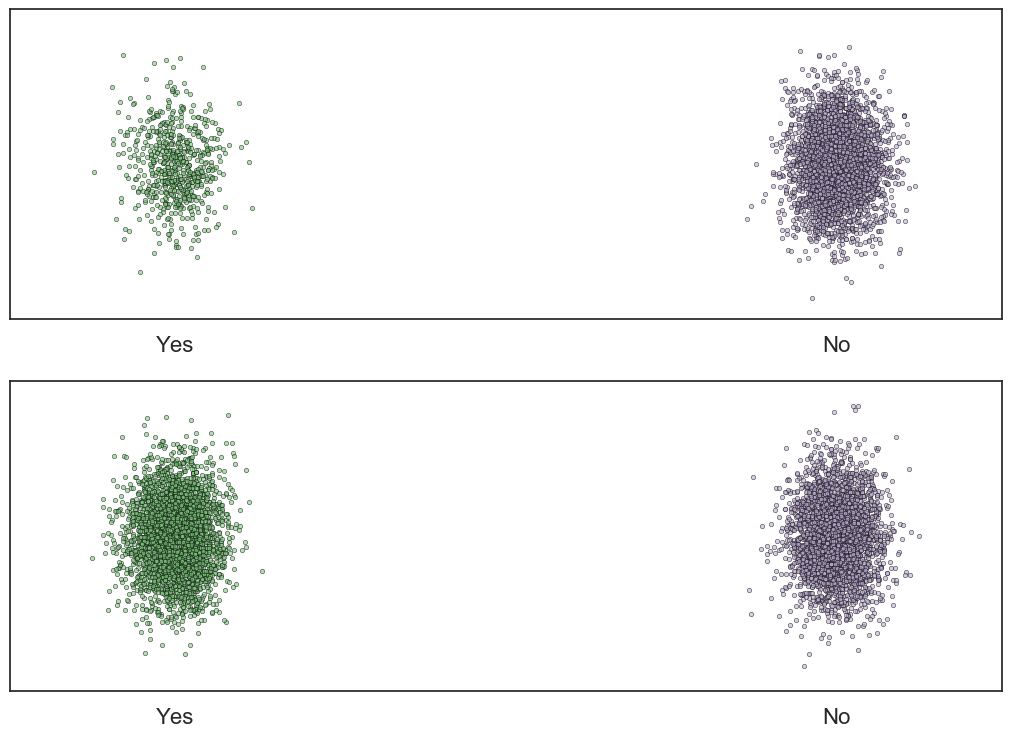

In [31]:
sm = SMOTE(k=6, m=15, out_step=0.5)
xre, yre = sm.fit_sample(X,y)
fig,ax0,ax1=sample_plotter(X,y)

#fig.savefig('../Assets/resample_example.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)

In [32]:
def modelfit(model, data, xcolumns, ycolumn='match', title='Model', 
             test_size=.25, splits=4, scale_data=True, resamp=True):
    
    if scale_data:
        data[xcolumns] = scale(data[xcolumns])
    
    train_data, test_data = train_test_split(data, test_size=test_size, stratify=data[ycolumn],random_state=1000)
    xtrain, ytrain, xtest, ytest = train_data[xcolumns], train_data[ycolumn], test_data[xcolumns], test_data[ycolumn]
    
    sns.set_palette(palette='muted')
    
    if resamp:
        resamp = SMOTE(k=6, m=15)
        xtrain, ytrain = resamp.fit_sample(xtrain, ytrain)
        
    kfold = StratifiedKFold(n_splits=splits,shuffle=True,random_state=8888)
    model.fit(xtrain, ytrain)
    
    predictions = model.predict(xtest)
    probability = model.predict_proba(xtest)[:,1]
    cv_score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='recall')
        
    
    print ("Classification\n")
    print ("Accuracy : {0:.4f}".format(accuracy_score(ytest, predictions)))
    print ("AUC Score (Train): {0:.4f}".format(roc_auc_score(ytest, probability)))
    print ("CV Score : Mean {0:.4f} | Std {1:.4f} | Min {2:.4f} | Max {3:.4f}".format(
            np.mean(cv_score),
            np.std(cv_score),
            np.min(cv_score),
            np.max(cv_score)))
    print(classification_report(ytest, predictions))
    
    if hasattr(model,'feature_importances_'):  
        fig=plt.figure(figsize=(13,5))
        feat_imp = pd.Series(model.feature_importances_, xcolumns).sort_values(ascending=False)
        
        feat_imp = feat_imp.iloc[:30]
        
        feat_plot = feat_imp.plot(kind='bar',title='Feature Importances: {}'.format(title),fontsize=10)
        plt.ylabel('Feature Importance')
        fig.autofmt_xdate(bottom=0,rotation=45)
        plt.show()
        return fig
    else:
        try:
            fig=plt.figure(figsize=(13,5))
            coefs_imp = pd.Series(model.coef_[0], xcolumns)
            imask=coefs_imp.abs().sort_values(ascending=False)[:30].index            
            coefs_imp = coefs_imp.loc[imask].sort_values(ascending=False)
            coef_fig = coefs_imp.plot(kind='bar',title='Coef Values: {}'.format(title),fontsize=10)
            plt.ylabel('Coef Values')
            fig.autofmt_xdate(bottom=0,rotation=45)
            plt.show()
            return fig
        except:
            print('NO COEFS')

In [33]:
def roc_curve_plot(y_true, y_score,title):

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f}, {1})'.format(roc_auc, title))
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

# No Resampling

In [34]:
gbc0 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=36, min_weight_fraction_leaf=0.0,
              n_estimators=3800, presort='auto', random_state=None,
              subsample=0.8, verbose=0, warm_start=False)

lgr0 = LogisticRegression(C= 10, max_iter= 80, penalty= 'l1')

svc0 = SVC(C= 14.37, gamma = 1/140,probability=True)

##################################################################
################### GradientBoostingClassifier ###################
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       826
          1       0.51      0.16      0.24       160

avg / total       0.80      0.84      0.80       986



##########################################################
################### LogisticRegression ###################
             precision    recall  f1-score   support

          0       0.84      0.99      0.91       826
          1       0.53      0.06      0.10       160

avg / total       0.79      0.84      0.78       986



###########################################
################### SVC ###################
             precision    recall  f1-score   support

          0       0.84      1.00      0.91       826
          1       0.00      0.00      0.00       160

avg / total       0.70      0.84      0.76       986





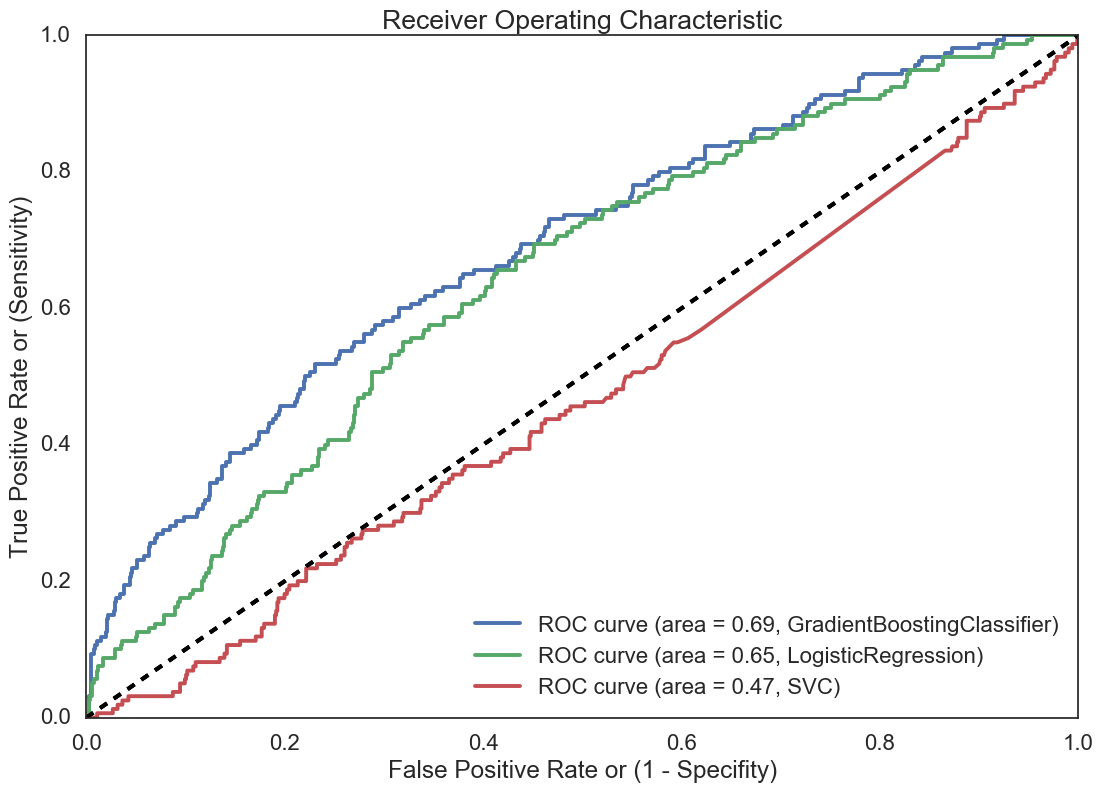

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y,  test_size=.25, stratify=y,random_state=888)

gbc0.fit(xtrain, ytrain)
lgr0.fit(xtrain, ytrain)
svc0.fit(xtrain, ytrain)

models = zip(['GradientBoostingClassifier','LogisticRegression','SVC'],[gbc0,lgr0,svc0])
fig = plt.figure()

for name, model in models:
    pred = model.predict(xtest)
    pred_proba = model.predict_proba(xtest)[:,1]
    
    print('####################'+'#'*len(name)+'####################')
    print('###################',name,'###################')
    print(classification_report(ytest,pred))
    roc_curve_plot(ytest, pred_proba, title=name)
    print('\n')

plt.show();
fig.savefig('../Assets/bad_roc_plot.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)

## Resample

In [36]:
from sklearn.ensemble import VotingClassifier
gbc1 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1.0526315789473693, min_samples_leaf=4,
              min_samples_split=24, min_weight_fraction_leaf=0.0,
              n_estimators=360, presort='auto', random_state=None,
              subsample=0.8, verbose=0, warm_start=False)

lgr1 = LogisticRegression(C=5.1454545454545446, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=180,
          multi_class='ovr', n_jobs=3, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

svc1 = SVC(C=10,gamma=0.014285714285714285, kernel='rbf',probability=True,)

vote1 = VotingClassifier(estimators=[
        ('gbc', gbc1), ('lgr', lgr1), ('svc', svc1)], voting='soft',weights=(2, 2, 1))

##################################################################
################### GradientBoostingClassifier ###################
             precision    recall  f1-score   support

          0       0.86      0.83      0.85       826
          1       0.27      0.32      0.29       160

avg / total       0.77      0.75      0.76       986



##########################################################
################### LogisticRegression ###################
             precision    recall  f1-score   support

          0       0.87      0.63      0.73       826
          1       0.21      0.52      0.30       160

avg / total       0.76      0.61      0.66       986



###########################################
################### SVC ###################
             precision    recall  f1-score   support

          0       0.86      0.94      0.90       826
          1       0.42      0.22      0.29       160

avg / total       0.79      0.82      0.80       986



#########

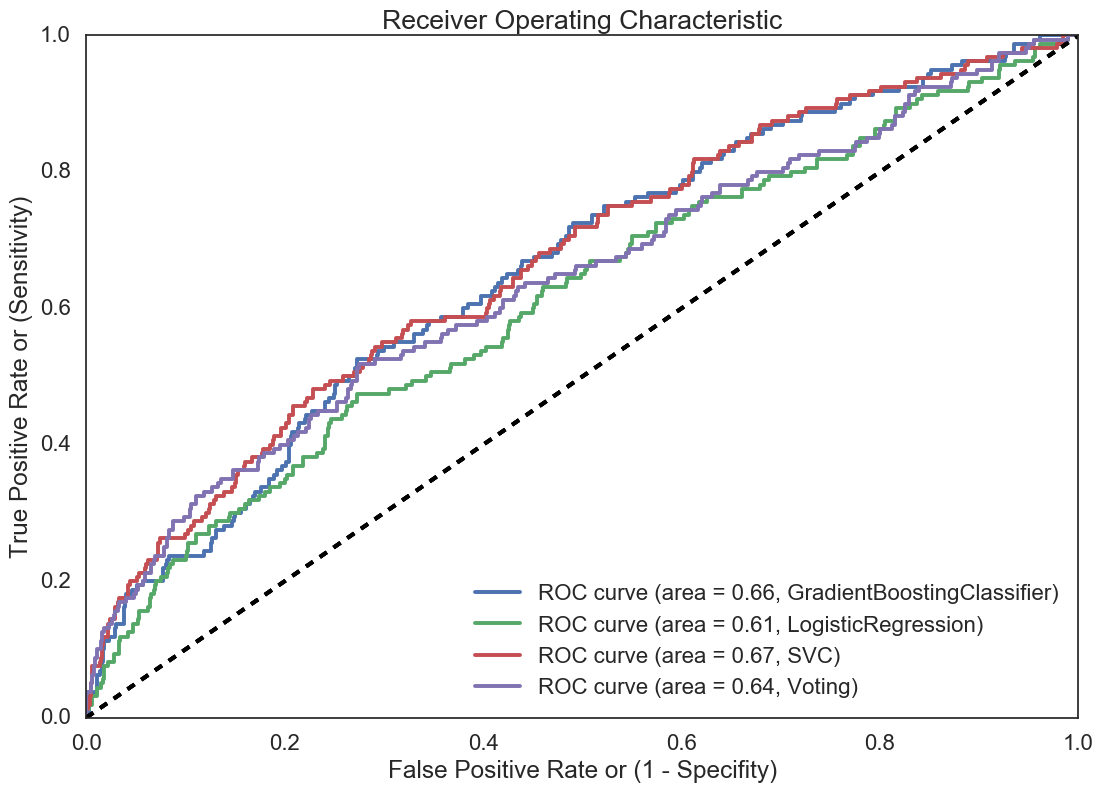

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X), y, test_size=.25, stratify=y, random_state=1000)

resamp = SMOTE(k=6, m=15)

x_resample, y_resample = resamp.fit_sample(xtrain, ytrain)

gbc1.fit(x_resample, y_resample)
lgr1.fit(x_resample, y_resample)
svc1.fit(x_resample, y_resample)
vote1.fit(x_resample, y_resample)

models = zip(['GradientBoostingClassifier','LogisticRegression','SVC','Voting'],[gbc1,lgr1,svc1,vote1])
fig = plt.figure()
for name, model in models:
    
    pred = model.predict(xtest)
    pred_proba = model.predict_proba(xtest)[:,1]
    
    print('####################'+'#'*len(name)+'####################')
    print('###################',name,'###################')
    print(classification_report(ytest,pred))
    roc_curve_plot(ytest, pred_proba, title=name)
    print('\n')

plt.show();
fig.savefig('../Assets/better_roc_plot.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)

## Once again

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X), y, stratify=y,random_state=888)
xresamp, yresamp = SMOTE(k=6, m=15).fit_sample(xtrain, ytrain)

In [39]:
fig = modelfit(svc0, dataset, predictors, ycolumn='match', title='SVC', 
               test_size=0.25, splits=3, scale_data=True, resamp=False)

Classification

Accuracy : 0.8134
AUC Score (Train): 0.6749
CV Score : Mean 0.2250 | Std 0.0153 | Min 0.2062 | Max 0.2437
             precision    recall  f1-score   support

          0       0.87      0.92      0.89       826
          1       0.39      0.27      0.32       160

avg / total       0.79      0.81      0.80       986

NO COEFS


In [40]:
fig = modelfit(svc1, dataset, predictors, ycolumn='match', title='SVC', 
               test_size=0.25, splits=3, scale_data=True, resamp=True)

Classification

Accuracy : 0.8215
AUC Score (Train): 0.6647
CV Score : Mean 0.9701 | Std 0.0131 | Min 0.9527 | Max 0.9842
             precision    recall  f1-score   support

          0       0.86      0.94      0.90       826
          1       0.40      0.21      0.27       160

avg / total       0.79      0.82      0.80       986

NO COEFS


Classification

Accuracy : 0.8387
AUC Score (Train): 0.6127
CV Score : Mean 0.0417 | Std 0.0128 | Min 0.0250 | Max 0.0563
             precision    recall  f1-score   support

          0       0.84      0.99      0.91       826
          1       0.53      0.06      0.11       160

avg / total       0.79      0.84      0.78       986



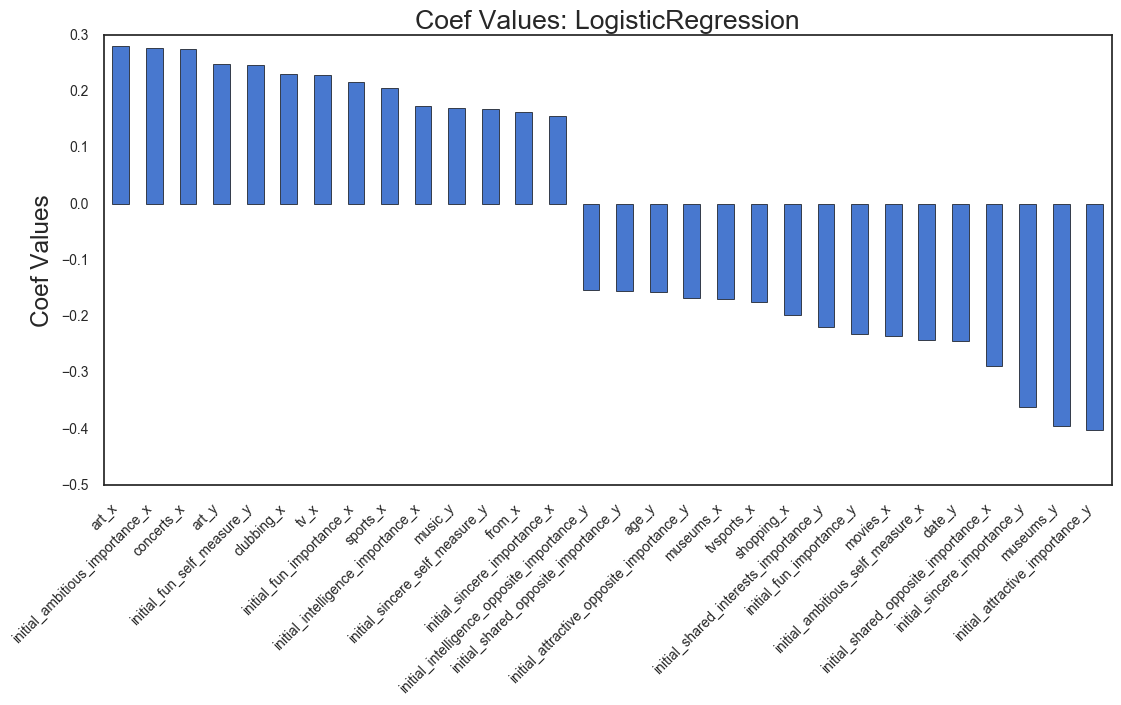

In [41]:
fig = modelfit(lgr0, dataset, predictors, ycolumn='match', title='LogisticRegression', 
               test_size=0.25, splits=3, scale_data=True, resamp=False)

fig.savefig('../Assets/lgr_no_resample.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)

Classification

Accuracy : 0.6197
AUC Score (Train): 0.6244
CV Score : Mean 0.6777 | Std 0.0134 | Min 0.6594 | Max 0.6909
             precision    recall  f1-score   support

          0       0.88      0.63      0.74       826
          1       0.22      0.54      0.32       160

avg / total       0.77      0.62      0.67       986



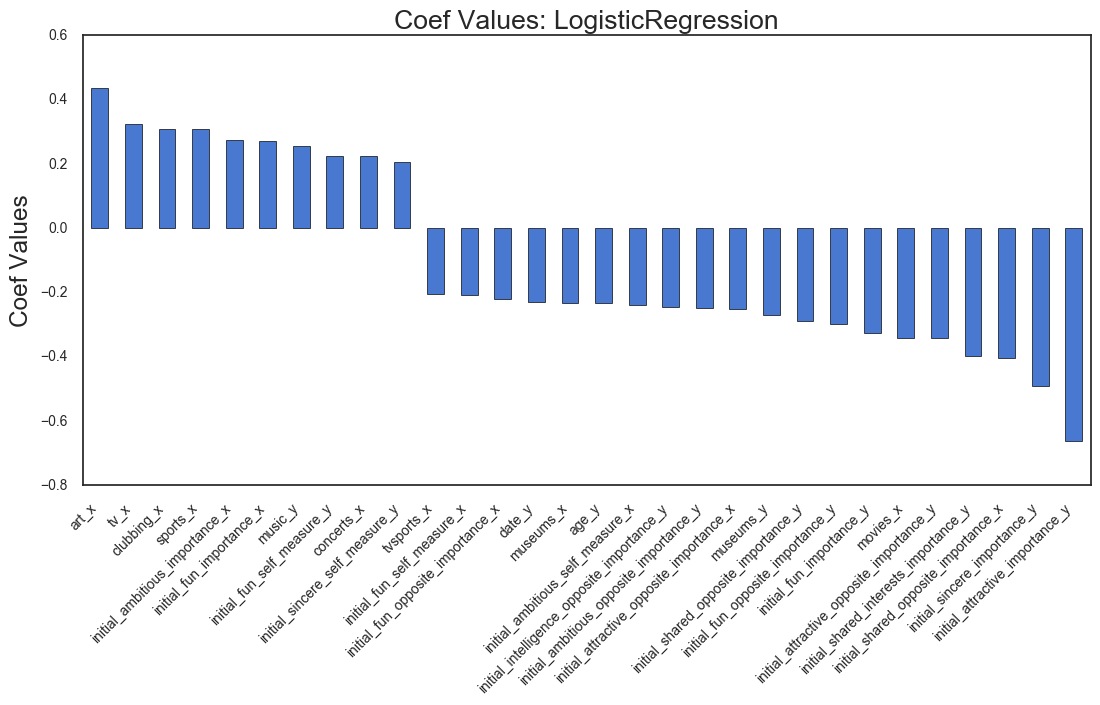

In [42]:
fig = modelfit(lgr1, dataset, predictors, ycolumn='match', title='LogisticRegression', 
               test_size=0.25, splits=3, scale_data=True, resamp=True)

fig.savefig('../Assets/lgr_resample.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)

Classification

Accuracy : 0.8327
AUC Score (Train): 0.6974
CV Score : Mean 0.1479 | Std 0.0078 | Min 0.1375 | Max 0.1562
             precision    recall  f1-score   support

          0       0.86      0.96      0.91       826
          1       0.46      0.17      0.25       160

avg / total       0.79      0.83      0.80       986



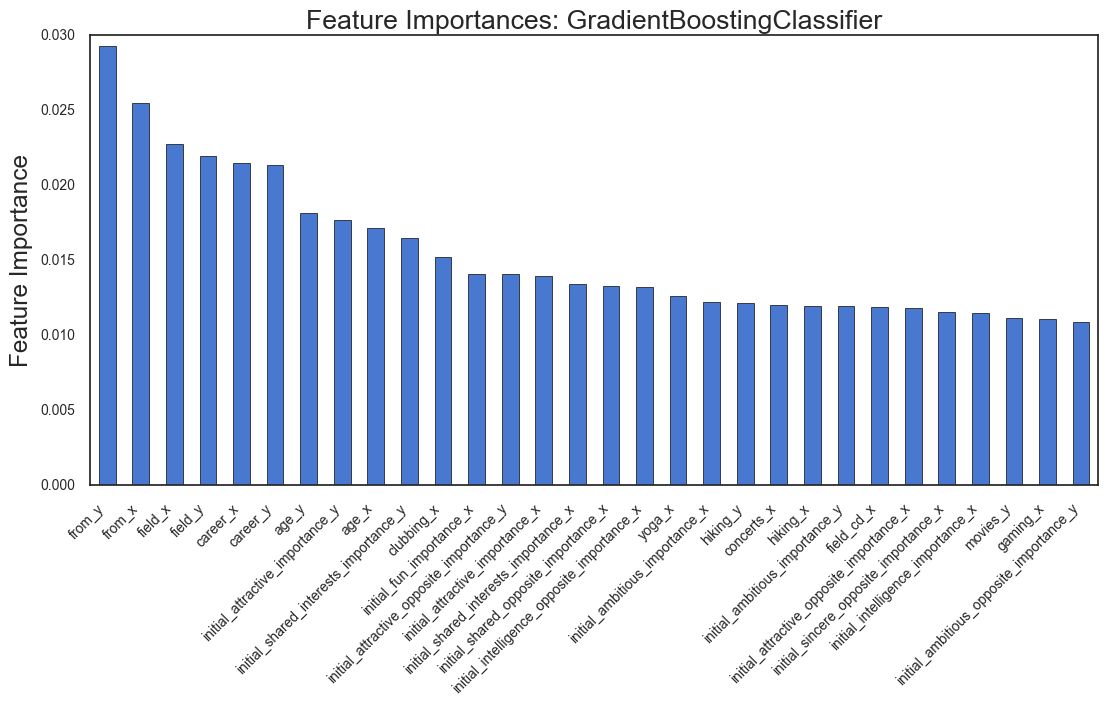

In [43]:
fig = modelfit(gbc0, dataset, predictors, ycolumn='match', title='GradientBoostingClassifier', 
                 test_size=0.25, splits=3, scale_data=True, resamp=False)

fig.savefig('../Assets/gbc_no_resample.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)

Classification

Accuracy : 0.7495
AUC Score (Train): 0.6553
CV Score : Mean 0.8732 | Std 0.0119 | Min 0.8630 | Max 0.8898
             precision    recall  f1-score   support

          0       0.87      0.83      0.85       826
          1       0.28      0.34      0.30       160

avg / total       0.77      0.75      0.76       986



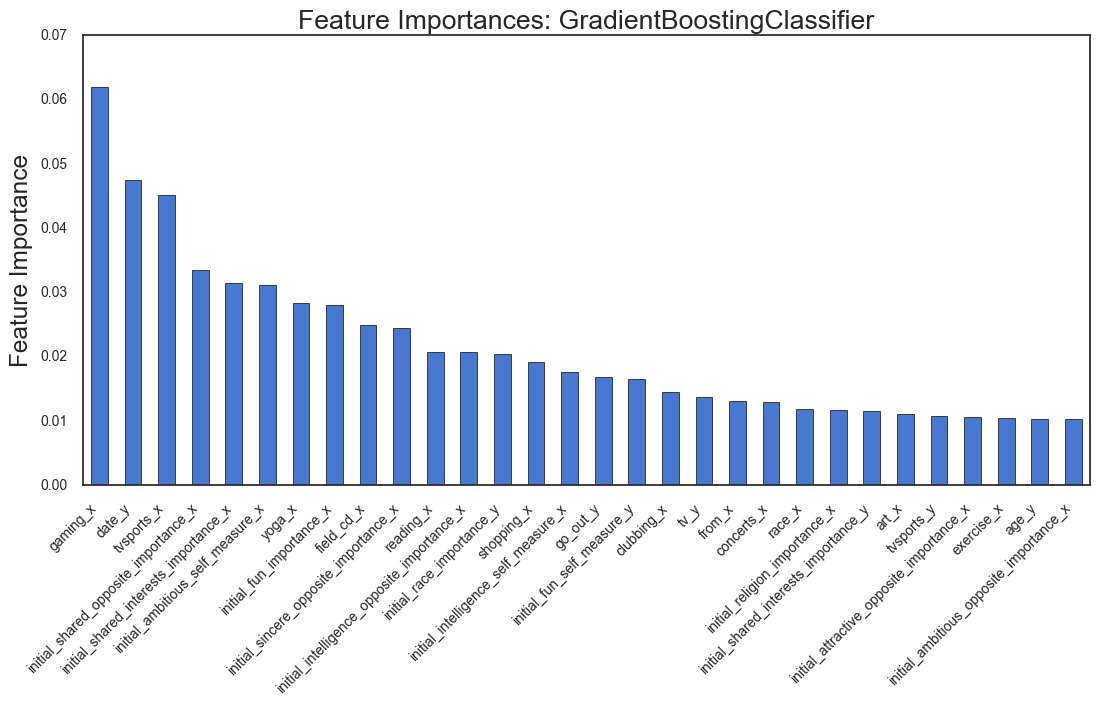

In [44]:
fig = modelfit(gbc1, dataset, predictors, ycolumn='match', title='GradientBoostingClassifier', 
                 test_size=0.25, splits=3, scale_data=True, resamp=True)

fig.savefig('../Assets/gbc_resample.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)